In [635]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import itertools
import seaborn as sns


class Strategy:
    def move(self, opponent_last_move):
        raise NotImplementedError("Each strategy must implement its own move method.")

In [652]:
class TitForTat:
    def __init__(self):
        self.last_opponent_move = "C"  

    def move(self, opponent_last_move):
        my_move = self.last_opponent_move  
        if opponent_last_move:
            self.last_opponent_move = opponent_last_move 
        return my_move 

class AlwaysDefect:
    def move(self, opponent_last_move):
        return "D" 

#Check
tft_player = TitForTat()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"]
for move in opponent_moves:
    my_move = tft_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")
print("============")
ad_player = AlwaysDefect()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"] 
for move in opponent_moves:
    my_move = ad_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")

Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: C
Player1: D, Player2: D
Player1: C, Player2: D
Player1: C, Player2: D
Player1: C, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D
Player1: D, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D


In [654]:
class GrimTrigger:
    def __init__(self):
        self.defected_once = False 

    def move(self, opponent_last_move):
        if opponent_last_move == "D":
            self.defected_once = True 
        return "D" if self.defected_once else "C" 
    
class AlwaysCooperate:
    def move(self, opponent_last_move):
        return "C" 


#Check
gt_player = GrimTrigger()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"]  
for move in opponent_moves:
    my_move = gt_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")
print("============")
ac_player = AlwaysCooperate()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"]  
for move in opponent_moves:
    my_move = ac_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")


Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: D
Player1: C, Player2: D
Player1: D, Player2: D
Player1: D, Player2: D
Player1: C, Player2: D
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: D, Player2: C
Player1: C, Player2: C


In [ ]:
class GenerousTitForTat:
    def __init__(self, forgiveness_prob=0.1):
        self.last_opponent_move = "C"
        self.forgiveness_prob = forgiveness_prob 

    def move(self, opponent_last_move):
        my_move = self.last_opponent_move
        if opponent_last_move:
            self.last_opponent_move = opponent_last_move
        
        if self.last_opponent_move == "D" and random.random() < self.forgiveness_prob:
            return "C" 
        
        return my_move

class Adaptive:
    def __init__(self, forgiveness_prob=0.3, betrayal_threshold=4):
        self.defection_count = 0  
        self.forgiveness_prob = forgiveness_prob  
        self.betrayal_threshold = betrayal_threshold  

    def move(self, opponent_last_move):
        if opponent_last_move == "D":
            self.defection_count += 1  
        
        if self.defection_count >= self.betrayal_threshold:
            return "D"
        
        if self.defection_count > 0 and random.random() < self.forgiveness_prob:
            return "C"

        return "C" 


#Check
gtft_player = GenerousTitForTat()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"]  
for move in opponent_moves:
    my_move = gtft_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")
print("============")
adap_player = Adaptive()
opponent_moves = ["C", "C", "D", "C", "D", "D", "C"] 
for move in opponent_moves:
    my_move = adap_player.move(move)
    print(f"Player1: {move}, Player2: {my_move}")

Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: D
Player1: D, Player2: C
Player1: D, Player2: D
Player1: C, Player2: D
Player1: C, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: C, Player2: C
Player1: D, Player2: C
Player1: D, Player2: C
Player1: C, Player2: C



Tournament Results:
TitForTat: 1074990 points
Adaptive: 940552 points
AlwaysDefect: 939868 points
GrimTrigger: 939691 points
AlwaysCooperate: 900000 points
GenerousTitForTat: 844962 points


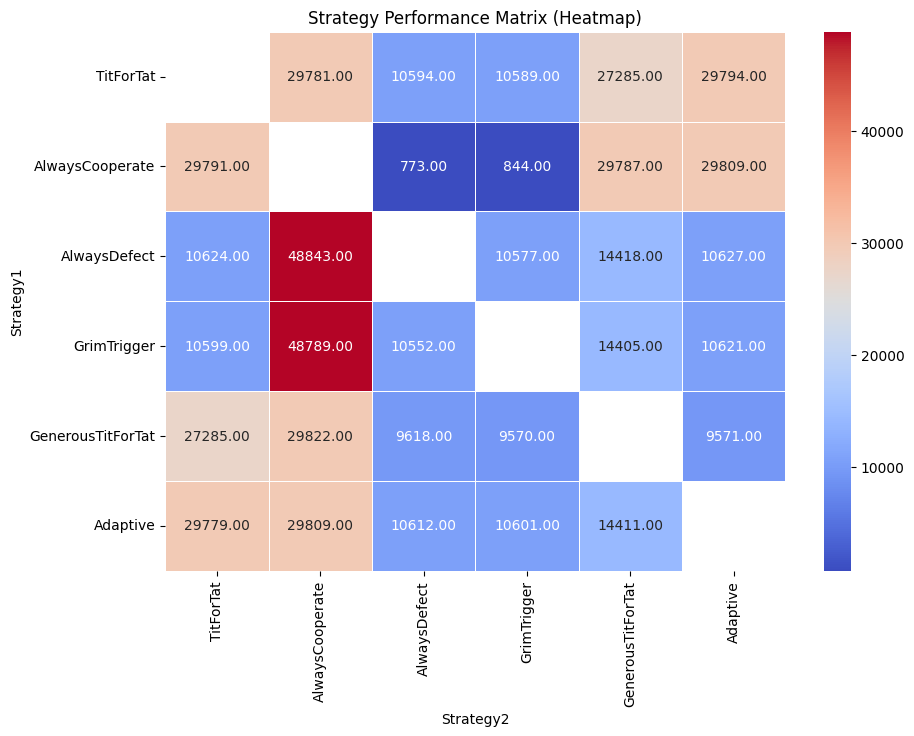

In [684]:
#Without error rate

def play_game(strategy1, strategy2, rounds=100000):
    """Plays an iterated Prisoner's Dilemma game between two strategies."""
    score1, score2 = 0, 0
    last_move1, last_move2 = None, None  

    # Payoff matrix
    PAYOFFS = {
        ("C", "C"): (3, 3),
        ("C", "D"): (0, 5),
        ("D", "C"): (5, 0),
        ("D", "D"): (1, 1),
    }

    for _ in range(rounds):
        move1 = strategy1.move(last_move2)
        move2 = strategy2.move(last_move1)
        last_move1, last_move2 = move1, move2

        
        s1, s2 = PAYOFFS[(move1, move2)]
        score1 += s1
        score2 += s2

    return score1, score2

def tournament(strategies, rounds=100000):
    """Runs a round-robin tournament between all strategies."""
    results = {str(s.__class__.__name__): 0 for s in strategies}

    for i, s1 in enumerate(strategies):
        for j, s2 in enumerate(strategies):
            if i < j: 
                score1, score2 = play_game(s1, s2, rounds)
                results[str(s1.__class__.__name__)] += score1
                results[str(s2.__class__.__name__)] += score2

    return results

strategies = [
    TitForTat(), AlwaysCooperate(), AlwaysDefect(),
    GrimTrigger(), GenerousTitForTat(), Adaptive()
]


results = tournament(strategies)

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nTournament Results:")
for strategy, score in sorted_results:
    print(f"{strategy}: {score} points")

df_results = pd.DataFrame(match_results, columns=["Strategy1", "Strategy2", "Score1", "Score2"])


total_scores = df_results.groupby("Strategy1")["Score1"].sum().reset_index()
total_scores = total_scores.sort_values(by="Score1", ascending=False)
total_scores.columns = ["Strategy", "Total Score"]

strategy_order = ["TitForTat"] + [s for s in df_results["Strategy1"].unique() if s != "TitForTat"]
pivot_table = df_results.pivot(index="Strategy1", columns="Strategy2", values="Score1")
pivot_table = pivot_table.reindex(index=strategy_order, columns=strategy_order)
plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Strategy Performance Matrix (Heatmap)")
plt.show()


Tournament Results:
TitForTat: 108043 points
Adaptive: 95212 points
AlwaysDefect: 95089 points
GrimTrigger: 94966 points
AlwaysCooperate: 91004 points
GenerousTitForTat: 85866 points


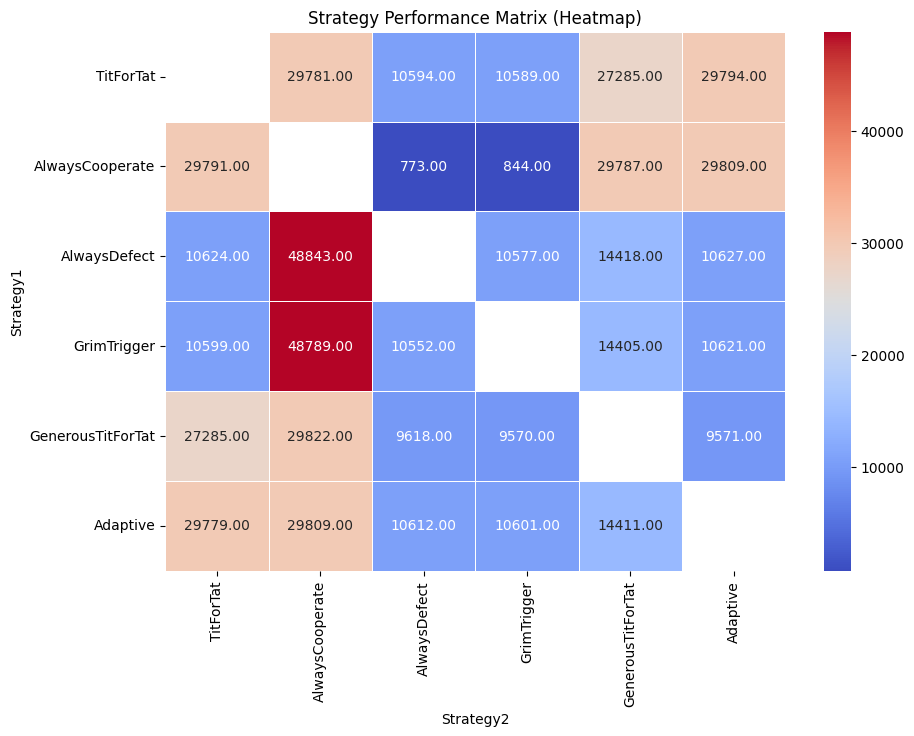

In [681]:
#With error rate

PAYOFFS = {
    ("C", "C"): (3, 3),
    ("C", "D"): (0, 5),
    ("D", "C"): (5, 0),
    ("D", "D"): (1, 1),
}

def play_game(strategy1, strategy2, rounds=10000, error_rate=0.02):
    score1, score2 = 0, 0
    last_move1, last_move2 = None, None

    for _ in range(rounds):
        move1 = strategy1.move(last_move2)
        move2 = strategy2.move(last_move1)
        last_move1, last_move2 = move1, move2

        if random.random() < error_rate:
            move1 = "D" if move1 == "C" else "C"
        if random.random() < error_rate:
            move2 = "D" if move2 == "C" else "C"

        s1, s2 = PAYOFFS[(move1, move2)]
        score1 += s1
        score2 += s2

    return score1, score2

def tournament(strategies, rounds=10000, error_rate=0.02):
    """Runs a round-robin tournament between all strategies."""
    results = {s.__class__.__name__: 0 for s in strategies}
    match_results = []

    for i, s1 in enumerate(strategies):
        for j, s2 in enumerate(strategies):
            if i < j:  
                score1, score2 = play_game(s1, s2, rounds, error_rate)
                results[s1.__class__.__name__] += score1
                results[s2.__class__.__name__] += score2
                match_results.append([s1.__class__.__name__, s2.__class__.__name__, score1, score2])
                match_results.append([s2.__class__.__name__, s1.__class__.__name__, score2, score1])

    return results, match_results



strategies = [
    TitForTat(), AlwaysCooperate(), AlwaysDefect(),
    GrimTrigger(), GenerousTitForTat(), Adaptive()
]


results, match_results = tournament(strategies, rounds=10000, error_rate=0.02)


df_results = pd.DataFrame(match_results, columns=["Strategy1", "Strategy2", "Score1", "Score2"])


total_scores = df_results.groupby("Strategy1")["Score1"].sum().reset_index()
total_scores = total_scores.sort_values(by="Score1", ascending=False)
total_scores.columns = ["Strategy", "Total Score"]

print("\nTournament Results:")
for strategy, score in total_scores.values:
    print(f"{strategy}: {score:} points")



strategy_order = ["TitForTat"] + [s for s in df_results["Strategy1"].unique() if s != "TitForTat"]

pivot_table = df_results.pivot(index="Strategy1", columns="Strategy2", values="Score1")

pivot_table = pivot_table.reindex(index=strategy_order, columns=strategy_order)

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Strategy Performance Matrix (Heatmap)")
plt.show()

